In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
#первичный анализ данных, фича инжиниринг, обучение стандартной моделью Ridge

df = pd.read_csv('ml-course-main/data/laptop_price.csv', encoding = "ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df['Cpus'] = 0
df['Gpus'] = 0
df['StorageVolume'] = 0
df['StorageType'] = 0
df['Screen'] = 0
df['StorageVolumeCategory'] = 0
df['StorageTypeCategory'] = 0
df['ScreenCategory'] = 0
df['CpuCategory'] = 0
df['GpuCategory'] = 0
df['TypeCategory'] = 0

for i in df:
    df['Cpus'] = df['Cpu'].str.extract('([A-Z a-z a-z]+)\d')
for i in df:
    df['Gpus'] = df['Gpu'].str.extract('([A-Z a-z a-z]+)\d')
df.loc[(df['Gpus'].isnull()), 'Gpus'] = 'Intel HD Graphics'
for i in df:
    df['StorageVolume'] = df['Memory'].str.extract('([0-9]+[A-Z]+)')
for i in df:
    df['StorageType'] = df['Memory'].str.replace(r'([0-9]+[A-Z]+) ', '')   
for i in df:
    df['Screen'] = df['ScreenResolution'].str.extract('([0-9]+)')
for i in df:
    df['Weight'] = df['Weight'].str.extract('([^kg]+)')
for i in df:
    df['Ram'] = df['Ram'].str.extract('([^GB]+)')
    
df = df.astype({'Screen':'int'})
df.loc[df['Screen'] == 1920, 'ScreenCategory'] = 1
df.loc[(df['Screen'] > 1920) & (df['Screen'] < 2880), 'ScreenCategory'] = 2
df.loc[df['Screen'] >= 2880, 'ScreenCategory'] = 3

df.loc[df['StorageType'] == 'Flash Storage', 'StorageTypeCategory'] = 1
df.loc[df['StorageType'] == 'SSD', 'StorageTypeCategory'] = 2
df.loc[df['StorageType'] == 'SSD +  HDD', 'StorageTypeCategory'] = 3

df.loc[(df['StorageVolume'] == '128GB') | (df['StorageVolume'] == '256GB'), 'StorageVolumeCategory'] = 1
df.loc[(df['StorageVolume'] == '512GB') | (df['StorageVolume'] == '1TB'), 'StorageVolumeCategory'] = 2
df.loc[df['StorageVolume'] == '2TB', 'StorageVolumeCategory'] = 3

df.loc[(df['Gpus'] == 'Intel Iris Graphics ') | (df['Gpus'] == 'Intel Iris Plus Graphics ') | (df['Gpus'] == 'Nvidia GeForce GT ') | (df['Gpus'] == 'Nvidia GeForce ') | (df['Gpus'] == 'AMD Radeon ') | (df['Gpus'] == 'Nvidia Quadro M ')  | (df['Gpus'] == 'Nvidia GeForce MX') , 'GpuCategory'] = 1
df.loc[(df['Gpus'] == 'Nvidia GeForce GTX ') | (df['Gpus'] == 'AMD R ') | (df['Gpus'] == 'AMD Radeon R') | (df['Gpus'] == 'AMD FirePro W ') | (df['Gpus'] == 'AMD Radeon ') | (df['Gpus'] == 'AMD Radeon Pro ')  | (df['Gpus'] == 'AMD Radeon RX ') | (df['Gpus'] == 'Nvidia GTX ') | (df['Gpus'] == 'Nvidia Quadro ') , 'GpuCategory'] = 2

df.loc[(df['Cpus'] == 'Intel Core i') | (df['Cpus'] == 'Intel Core M m') | (df['Cpus'] == 'AMD Ryzen') | (df['Cpus'] == 'Intel Xeon E') , 'CpuCategory'] = 1

df.loc[df['TypeName'] == 'Notebook', 'TypeCategory'] = 1
df.loc[df['TypeName'] == 'Gaming', 'TypeCategory'] = 2
df.loc[df['TypeName'] == 'Ultrabook', 'TypeCategory'] = 3
df.loc[df['TypeName'] == '2 in 1 Convertible', 'TypeCategory'] = 4
df.loc[df['TypeName'] == 'Workstation', 'TypeCategory'] = 5




In [4]:
df = df.drop(columns=["Company","laptop_ID","Product","Cpu","Gpu","Cpus","Gpus","OpSys","StorageVolume","StorageType","ScreenResolution","Screen","Memory","TypeName"])
df = df.astype({'Inches':'float','Ram':'int','Weight':'float','Price_euros':'float','StorageVolumeCategory':'int','StorageTypeCategory':'int','ScreenCategory':'int'})
df.shape
df.tail(10)


,Inches,Ram,Weight,Price_euros,StorageVolumeCategory,StorageTypeCategory,ScreenCategory,CpuCategory,GpuCategory,TypeCategory
1293,15.6,8,2.60,899.00,2,0,1,1,2,1
1294,15.6,6,2.04,549.99,0,0,1,0,2,1
1295,15.6,8,2.30,805.99,2,0,0,1,2,1
1296,11.6,2,1.17,209.00,0,1,0,0,0,0
1297,15.6,4,2.20,720.32,0,0,0,1,1,1
1298,14.0,4,1.80,638.00,1,2,1,1,0,4
1299,13.3,16,1.30,1499.00,2,2,3,1,0,4
1300,14.0,2,1.50,229.00,0,1,0,0,0,1
1301,15.6,6,2.19,764.00,2,0,0,1,2,1
1302,15.6,4,2.20,369.00,0,0,0,0,0,1


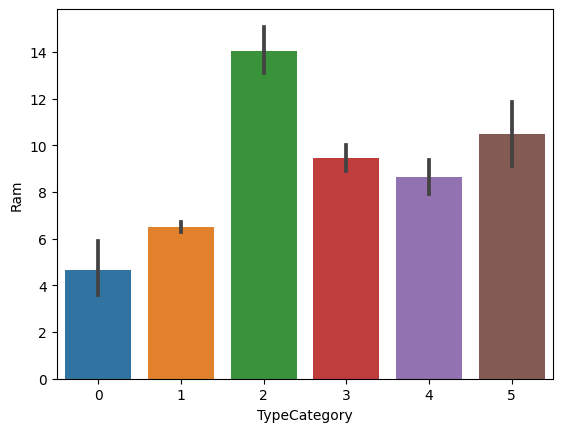

In [5]:
sns.barplot(x = "TypeCategory", y = "Ram", data = df); #в игровых обычно больше всего памяти

In [6]:
df['Price_euros'].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price_euros, dtype: float64

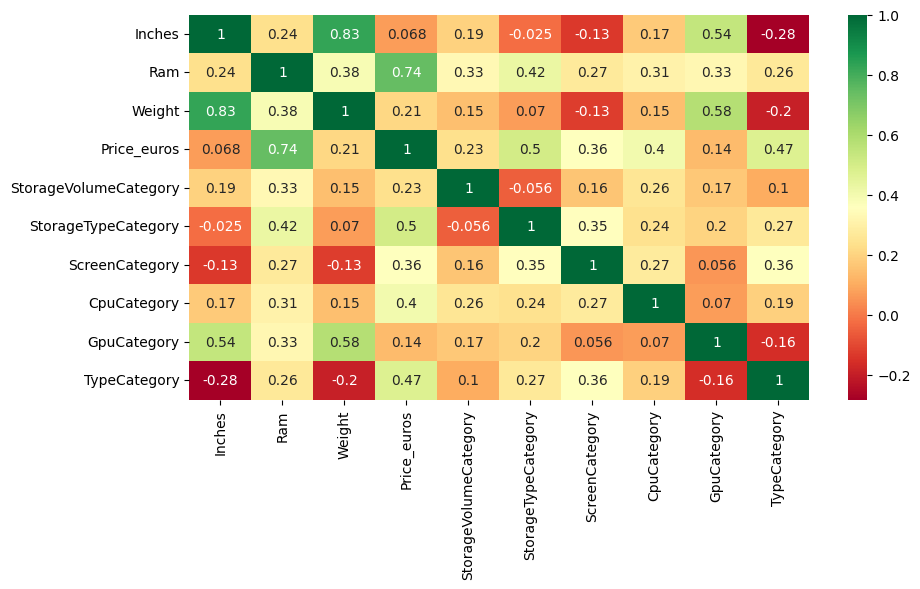

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()
#Между объемом ОЗУ и ценой большая корреляция, а также меду весом и размером экрана. От веса также большая зависимость категории ГПУ.

In [8]:
df['StorageVolumeCategory'].value_counts().to_frame().style.background_gradient(cmap='summer')  # ноутбуков по категориям хранилища данных

,StorageVolumeCategory
1,685
2,380
0,222
3,16


In [9]:
from sklearn.model_selection import train_test_split

y = df["Price_euros"]
X = df.drop(columns=["Price_euros"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

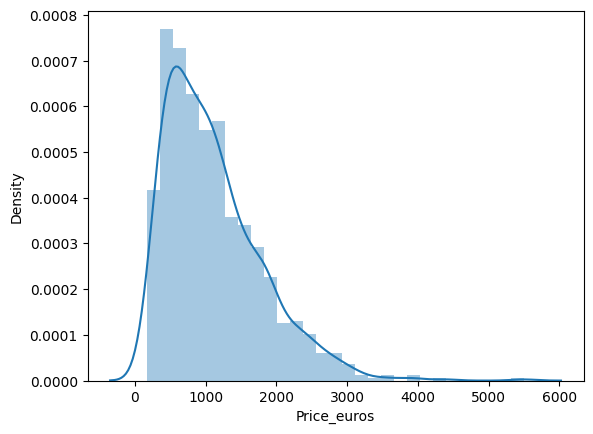

In [10]:
sns.distplot(y_train);

In [11]:
numeric_data = X_train.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_mean)
X_test = X_test.fillna(numeric_mean)

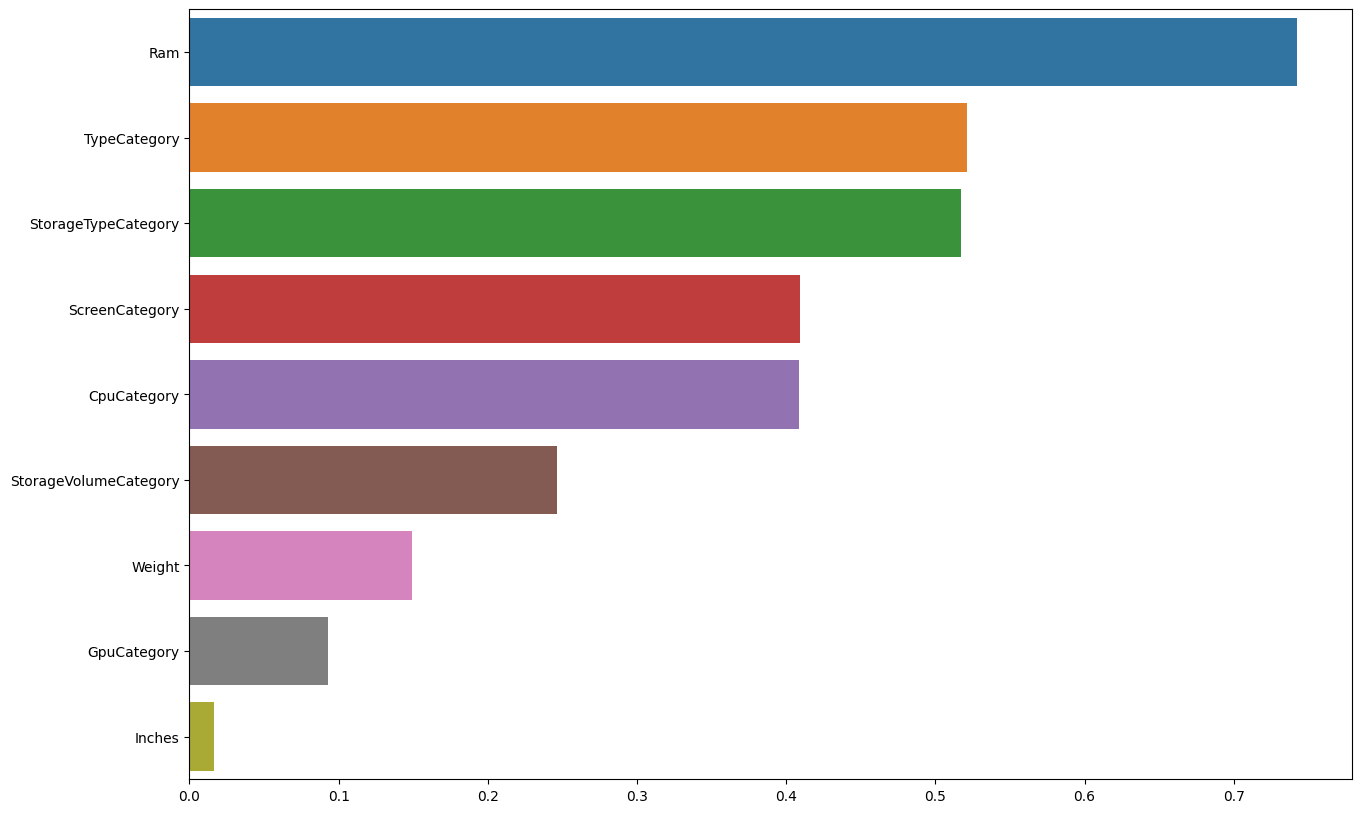

In [12]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()  # выбранная модель

model.fit(X_train[numeric_features], y_train)  # обучение модели на обучающей выборке

y_train_pred = model.predict(X_train[numeric_features])  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test[numeric_features])  # или на тестовой выборке

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))


Test RMSE = 428.1478135952257
Train RMSE = 378.60540512696053


In [14]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=5, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 338.3245
	325.6242
	386.9109
	424.8571
	441.3750
Mean CV RMSE = 383.4183


In [15]:
stupid_pred = y_train.mean()
print("Test RMSE with stupid predictor =", mean_squared_error(y_test, stupid_pred * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with stupid predictor =", mean_squared_error(y_train, stupid_pred * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with stupid predictor = 733.2601484725133
Train RMSE with stupid predictor = 683.6136863320455


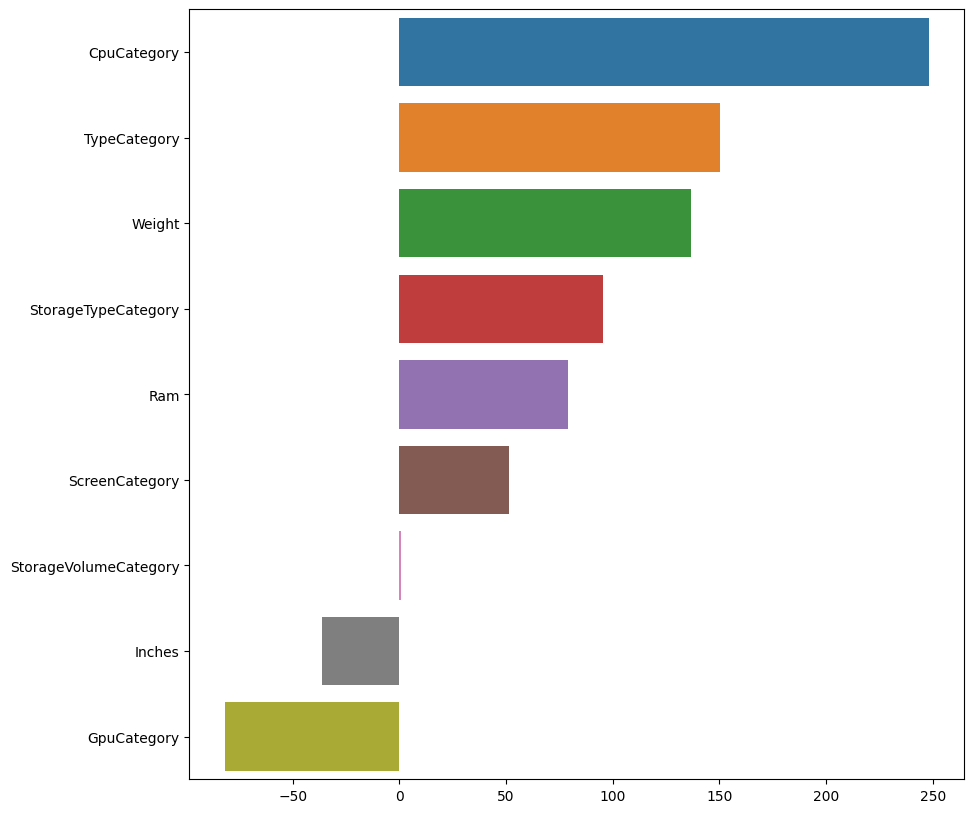

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train[numeric_features].std()), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

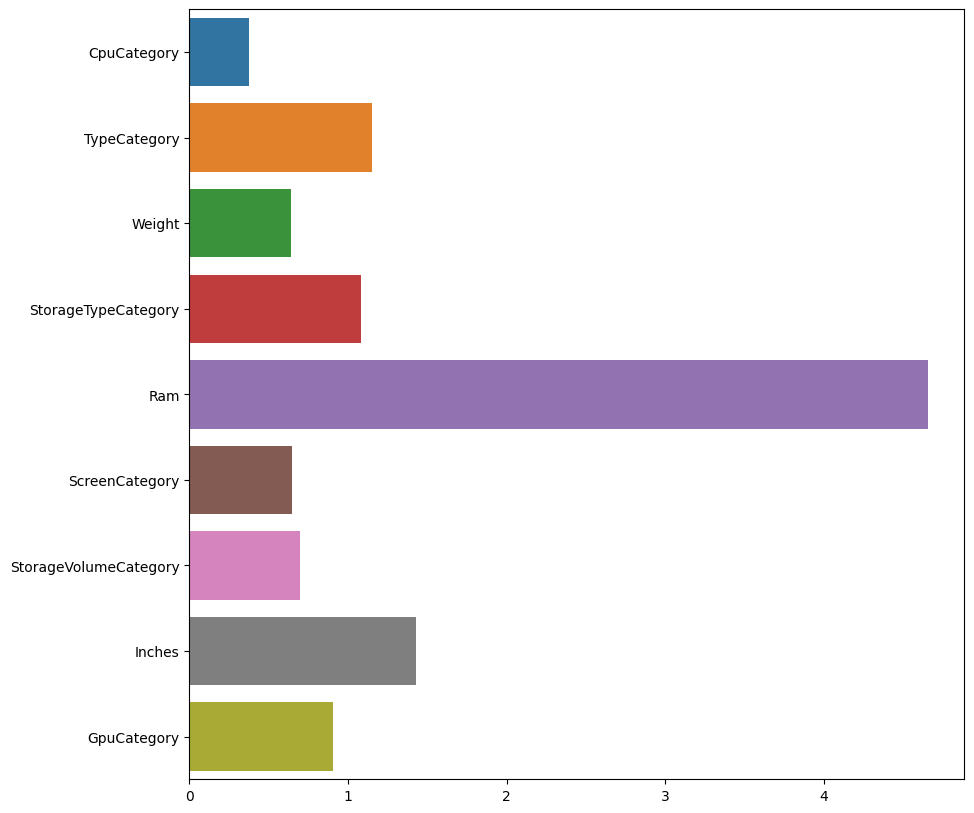

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 428.1122
Train RMSE = 378.6046


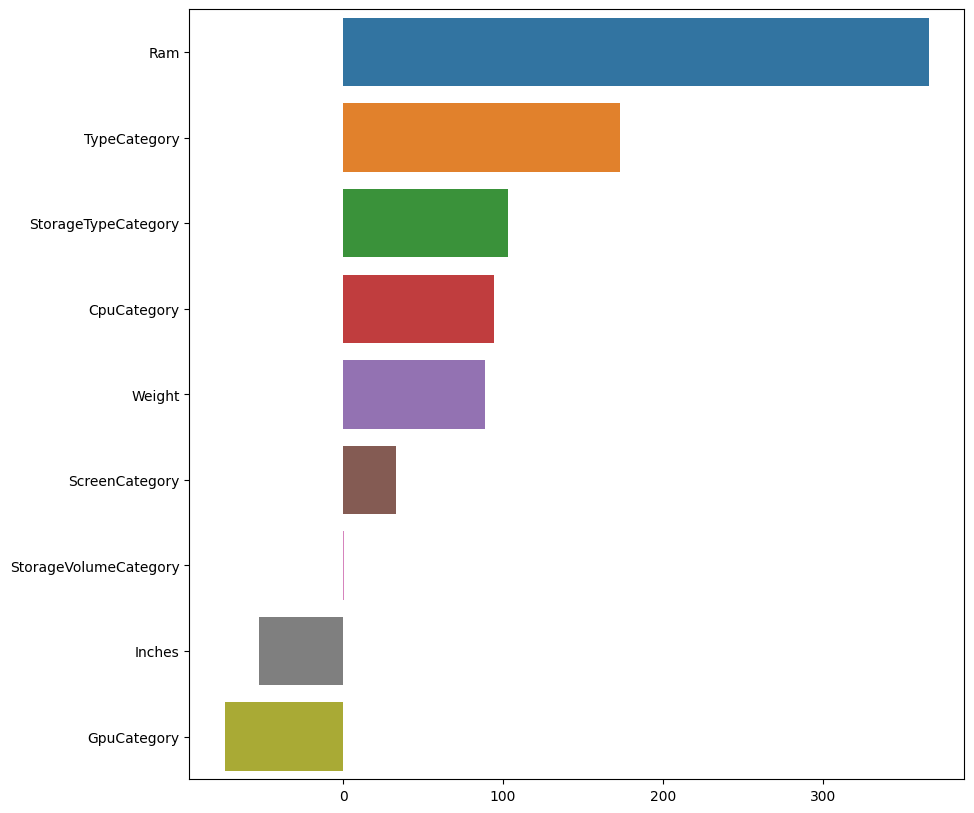

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train_scaled.std(axis=0)), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

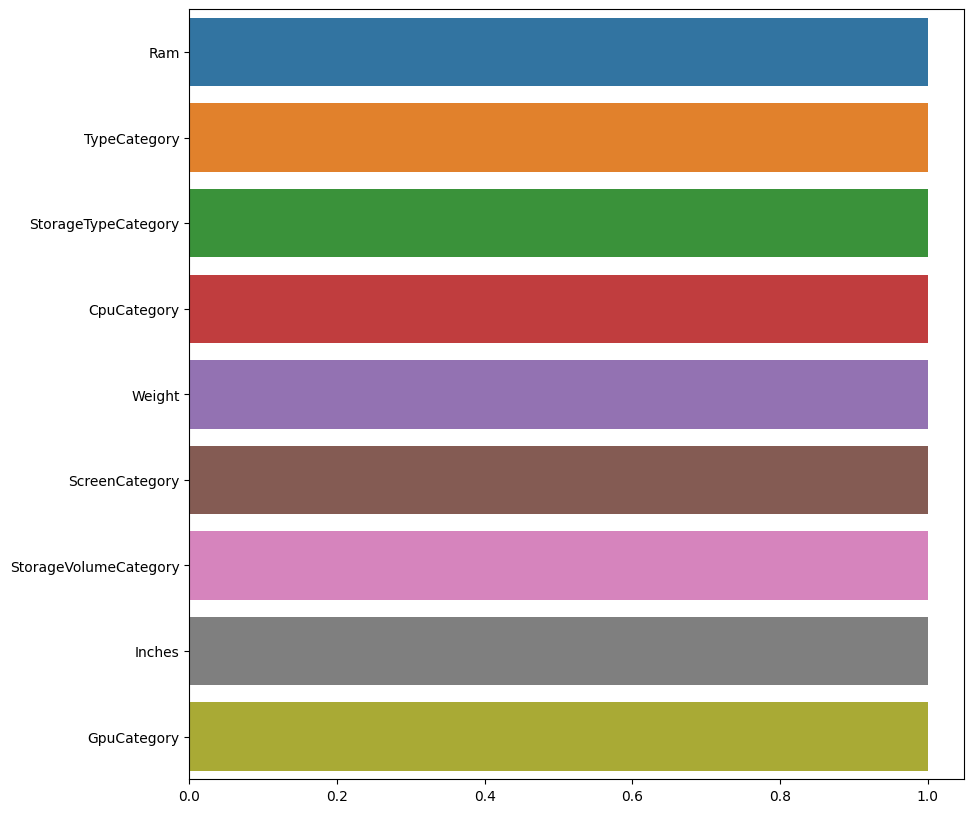

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

Text(0, 0.5, 'CV score')

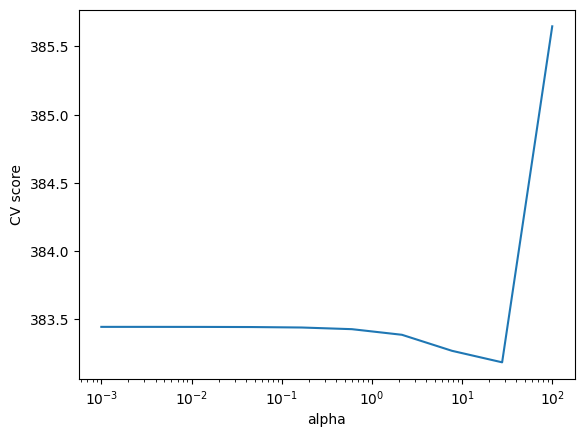

In [21]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 2, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [22]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 27.8256


In [23]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE =", mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 426.8525304265502


In [24]:
#реализация градиентного спуска

In [27]:
import numpy as np
import random
import sklearn
from sklearn.datasets import make_regression 
import pylab
from scipy import stats

def gradient_descent(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    
    x = np.c_[ np.ones(m), x] #theta0(hyphotesis for theta0 = 1*1)
    
    theta = np.ones(x.shape[1])
    x_transpose = x.transpose()
    
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost
        #print ('iter= ', iter,'J= ', J)
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

In [28]:
#X_test_scaled, X_train_scaled, y_train, y_test

(912, 9) sdasd (10,)


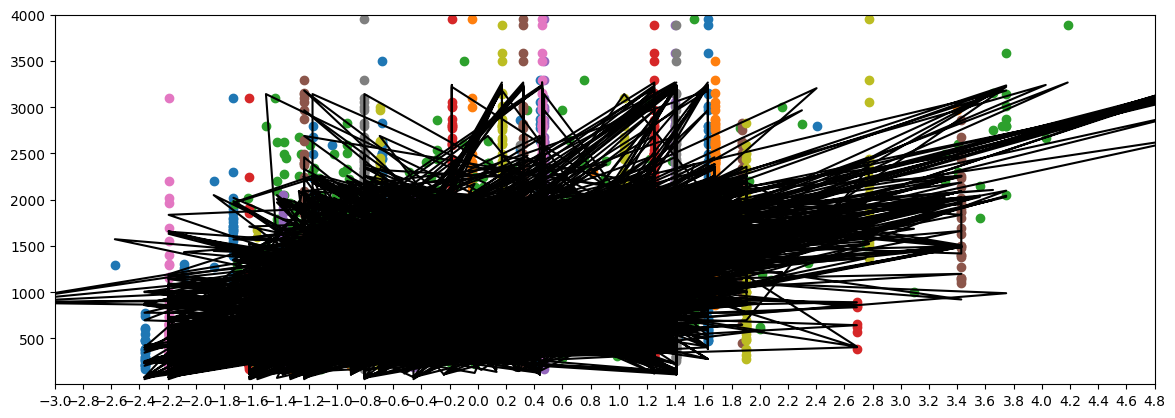

In [29]:
alpha = 0.01 # learning rate
theta = gradient_descent(alpha, X_train_scaled, y_train, 450)
y_predict = np.ones(X_train_scaled.shape[0])
y_predict *= theta[0]
print(X_train_scaled.shape,'sdasd',theta.shape)
for i in range(0, len(y_predict)):
    for j in range(1, theta.shape[0]):
        y_predict[i] += theta[j]*X_train_scaled[i,j-1]


plt.ylim(5,4000)
plt.xlim(-3,4)
plt.xticks(np.arange(-3, 5, step=0.2))
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.9 # inch margin
s = maxsize/plt.gcf().dpi*40+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

pylab.plot(X_train_scaled,y_train,'o')
pylab.plot(X_train_scaled,y_predict,'k-')
pylab.show()

(391, 9) sdasd (10,)


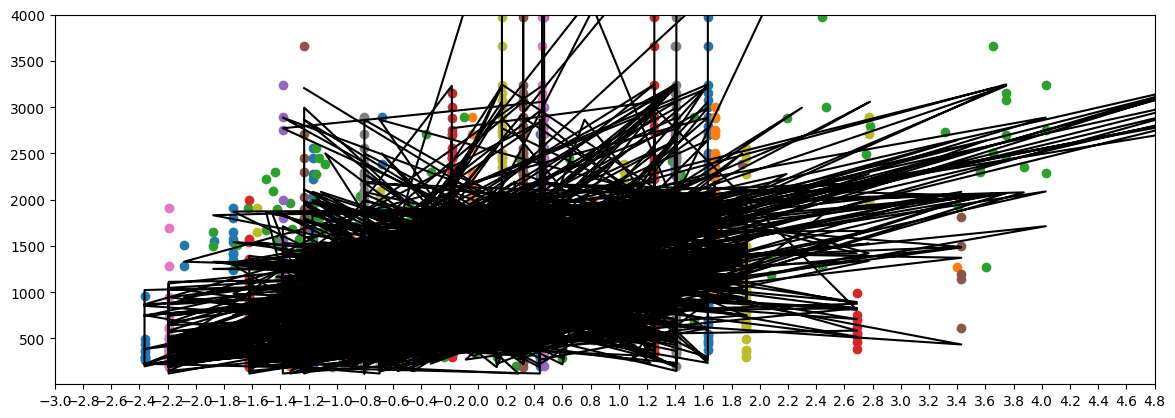

In [30]:
theta = gradient_descent(alpha, X_test_scaled, y_test, 450)
y_test_predict = np.ones(X_test_scaled.shape[0])
y_test_predict *= theta[0]
print(X_test_scaled.shape,'sdasd',theta.shape)
for i in range(0, len(y_test_predict)):
    for j in range(1, theta.shape[0]):
        y_test_predict[i] += theta[j]*X_test_scaled[i,j-1]
        
        
plt.ylim(5,4000)
plt.xlim(-3,4)
plt.xticks(np.arange(-3, 5, step=0.2))
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.9 # inch margin
s = maxsize/plt.gcf().dpi*40+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

pylab.plot(X_test_scaled,y_test,'o')
pylab.plot(X_test_scaled,y_test_predict,'k-')
pylab.show()

In [31]:
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_predict, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_predict))

Train RMSE = 379.5388
Train MSE = 144049.7129


In [32]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predict, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_test_predict))

Test RMSE = 422.0758
Test MSE = 178148.0230


In [33]:
from sklearn.metrics import r2_score
print("Train coefficient of determination = %.4f" % r2_score(y_train, y_predict, force_finite=False))
print("Test coefficient of determination = %.4f" % r2_score(y_test, y_test_predict, force_finite=False))

Train coefficient of determination = 0.6918
Test coefficient of determination = 0.6673


In [34]:
#Модель, обученная градиентным спуском, схожа с моделью Ridge библиотеки sklearn.

In [35]:
from sklearn.model_selection import cross_val_score

mse_scores_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
mse_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_mean_squared_error")
rmse_scores_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_root_mean_squared_error")
r2_scores_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2")
r2_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="r2")

cv_scores = np.array([mse_scores_train,mse_scores_test,rmse_scores_train,rmse_scores_test,r2_scores_train,r2_scores_test])

for i in range(4):
    cv_scores[i]*=-1

scores_table = pd.DataFrame(data=cv_scores,
             index=['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
             columns=['Fold1','Fold2','Fold3','Fold4','Fold5'])  

In [36]:
def expected_value(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)
    return (values * weights).sum() / weights.sum()
    
expected_values = np.array([expected_value(X_train_scaled[0],theta[1-9]),expected_value(X_test_scaled[0],theta[1-9]),expected_value(X_train_scaled[0],theta[1-9]),expected_value(X_test_scaled[0],theta[1-9]),expected_value(X_train_scaled[0],theta[1-9]),expected_value(X_test_scaled[0],theta[1-9])])
std_deviation = np.array([np.std(X_train_scaled[0]),np.std(X_test_scaled[0]),np.std(X_train_scaled[0]),np.std(X_test_scaled[0]),np.std(X_train_scaled[0]),np.std(X_test_scaled[0])])
scores_table['E'] = expected_values
scores_table['STD'] = std_deviation

In [37]:
#Вывод: элемент обучающей выборки обладает математическим ожиданием близким к 0 (-0.35),
#что говорит о хорошей настройке весов. 
#Девиация также имеет небольшие отклонения,
#что говорит об однородности входных данных,
#нормализованных стандартным скейлером.